### 1. importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [371]:
import string
import nltk
from nltk.corpus import stopwords

import spacy
nlp = spacy.load('en_core_web_sm')

from wordcloud import WordCloud
from collections import Counter

In [128]:
nltk.download('punkt') #there are some dependencies required by nltk to perform its task
nltk.download('stopwords')  # Downloading stop words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anujahlawat/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [418]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

### 2. importing data

In [12]:
df = pd.read_csv("spam.csv",encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3376,ham,Yup. Wun believe wat? U really neva c e msg i ...,NaN,NaN,NaN
4457,ham,Die... I accidentally deleted e msg i suppose ...,NaN,NaN,NaN
5112,spam,December only! Had your mobile 11mths+? You ar...,NaN,NaN,NaN
384,spam,Double mins and txts 4 6months FREE Bluetooth ...,NaN,NaN,NaN
4836,ham,....photoshop makes my computer shut down.,NaN,NaN,NaN


In [56]:
 
#1. By directly looking to the dataset we find that sentiments really make sense
#2. Unstructured data
#   By looking at the data, we find that our data contains various punctuations, special symbols, links etc.
#   so we need to clean our data as well beacause these punctuations, symbols doesn't give any sentiment
#3. data seems to be imbalanced as spam seems to be less in no as compared to ham

### 3. getting data ready (data cleaning)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [15]:
#1. we have total 5572 records. it is a small dataset.
#2. v1 is our target variable
#3. we are unaware of unnamed columns

#### 3.1 droping unnamed columns

In [18]:
df['Unnamed: 4'].unique()

array([nan, ' just Keep-in-touch\\" gdeve.."', 'GNT:-)"',
       ' Never comfort me with a lie\\" gud ni8 and sweet dreams"',
       ' CALL 2MWEN IM BK FRMCLOUD 9! J X\\""',
       ' one day these two will become FREINDS FOREVER!"'], dtype=object)

In [19]:
#unnamed columns have more than 95% missing values. so we can remove these columns.

In [20]:
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'},inplace=True)

#### 3.2 renaming columns

In [23]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

#### 3.3 LabelEncoder and converting object datatype into integer datatype

In [29]:
df.iloc[:,0].head(2)

0    ham
1    ham
Name: target, dtype: object

In [30]:
encoder = LabelEncoder()
df.iloc[:,0] = encoder.fit_transform(df.iloc[:,0])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [444]:
df['target'].dtype

dtype('int64')

In [ ]:
df['target'] = df['target'].astype('int')

#### 3.4 checking missing values

In [37]:
df.isnull().sum()

#1. we find no missing value

target    0
text      0
dtype: int64

#### 3.5 data duplicacy

In [42]:
df[df.duplicated()]

#1. we get 403 duplicate records

,target,text
102,0,As per your request 'Melle Melle (Oru Minnamin...
153,0,As per your request 'Melle Melle (Oru Minnamin...
206,0,"As I entered my cabin my PA said, '' Happy B'd..."
222,0,"Sorry, I'll call later"
325,0,No calls..messages..missed calls
...,...,...
5524,1,You are awarded a SiPix Digital Camera! call 0...
5535,0,"I know you are thinkin malaria. But relax, chi..."
5539,0,Just sleeping..and surfing
5553,0,Hahaha..use your brain dear


In [43]:
df.drop_duplicates(keep = 'first',inplace=True)

### 4. EDA

In [48]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


#### 4.1 checking how many are ham and how many are spam

In [50]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [52]:
#1. there are 4516 ham and 653 are spam and hence data is imbalanced. and this is because in real world 
#   percentage of spam is less than ham.

#### 4.2 pie chart for df['target']

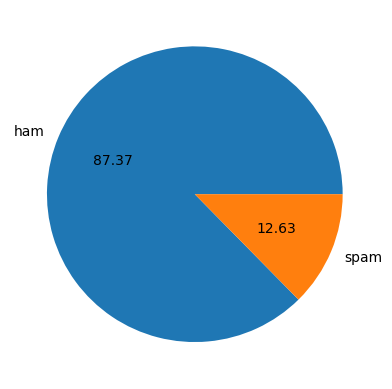

In [54]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')

plt.show()

In [55]:
#1. only 12.63% are spam and clearly data is imbalanced.

#### 4.3 finding no. of characters/alphabets, no. of words, no. of sentences used in the text/sms/email 

##### 4.3.1 no. of characters

In [64]:
df['num_char'] = df['text'].apply(len)             
df.head(3)
#it return no. of characters in a record (character can be num, alphabet, punctuations, special symbols etc.)

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


##### 4.3.2 no. of words

In [65]:
#counting this can be tricky
#we use nltk library for this

In [66]:
df['text'].apply(lambda x : nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [68]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head(3)

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


##### 4.3.3 no. of sentences

In [69]:
df['text'].apply(lambda x : nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [70]:
df['num_sent'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head(3)

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


##### 4.3.4 analysis of section 4.3

In [74]:
df.iloc[:,2:].describe()
#or
#df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [75]:
#1. avg no. of characters in a record = 78 and max no. of characters in a record = 910
#2. avg no. of words in a record = 18 and max no. of words = 220
#3. avg no. of sentences in a record = 2 and max no. sentences = 38

#note : let's analyse ham and spam differently

##### 4.3.4.1 analysis of section 4.3 for ham

In [77]:
df.iloc[:,2:][df['target']==0].describe()

#or
#df[df['target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


##### 4.3.4.2 analysis of section 4.3 for spam

In [78]:
df.iloc[:,2:][df['target']==1].describe()

#or
#df[df['target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [80]:
#1. check average values for ham and spam, we find that no. of characters, words, sentences in spam are more 
#   than ham

##### 4.3.5.1 histogram for no. of characters

<Axes: xlabel='num_char', ylabel='Count'>

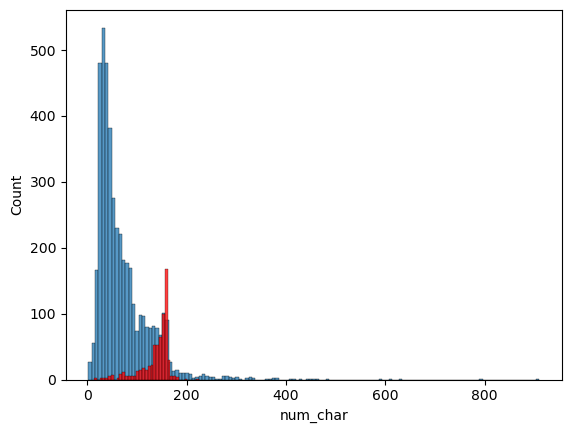

In [83]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')


#we can cleary see from graph that no. of characters in spam are more than no. of characters in ham

##### 4.3.5.2 histogram for no. of words

<Axes: xlabel='num_words', ylabel='Count'>

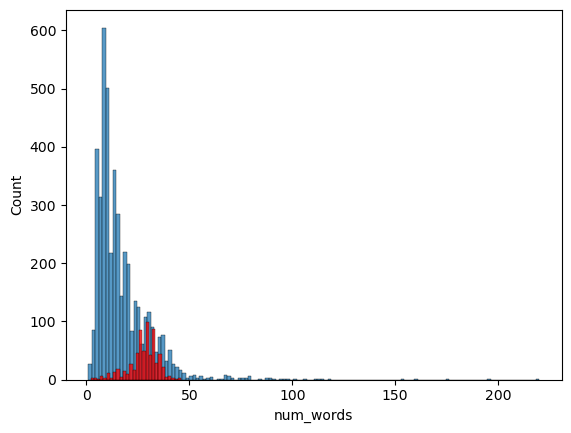

In [84]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')


#we can cleary see from graph that no. of words in spam are more than no. of characters in ham

##### 4.3.6 pairplot 

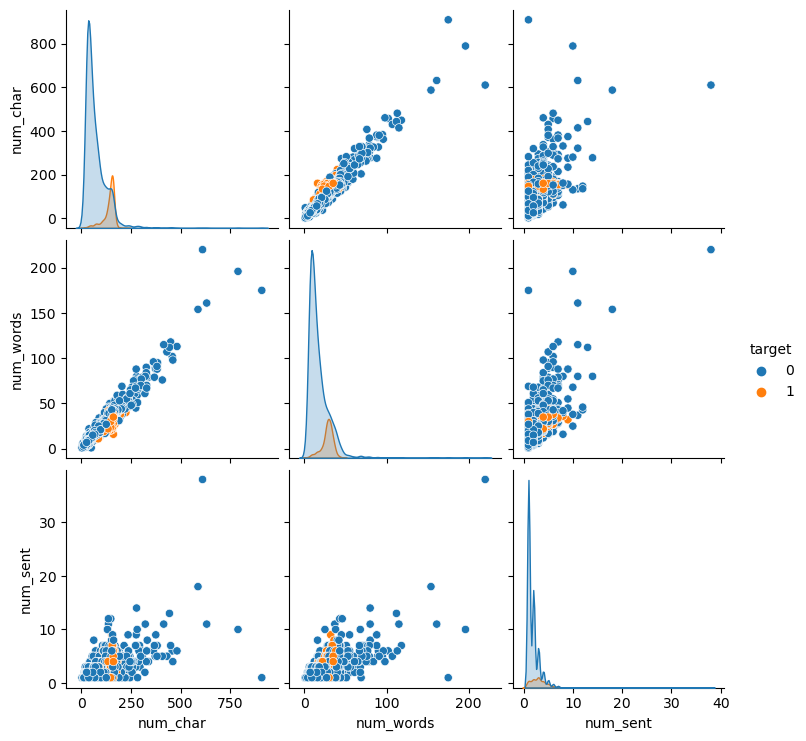

In [85]:
sns.pairplot(df,hue='target')

In [89]:
#1. num_sent vs num_char graph is not so much linear
#2. num_sent vs num_words graph is not so much linear
#3. num_words vs num_char graph is linear
#4. we sense some outliers in our dataset

#### 4.3.7 correlation

In [94]:
df[['target','num_char','num_words','num_sent']].corr()

,target,num_char,num_words,num_sent
target,1.000000,0.384717,0.262912,0.263939
num_char,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


<Axes: >

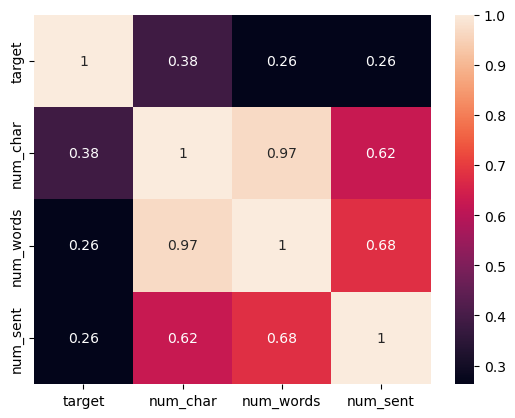

In [96]:
sns.heatmap(df[['target','num_char','num_words','num_sent']].corr(),annot=True)

#annot=True it means corr labeling over blocks

In [97]:
#1. no. of characters and target have more corr. than others
#2. no. of words and no. of characters have high corr. as well
#3. no. of sentences have fair corr. with no. of char and no. of words

#result:while building model we can consider num_char, num_words, num_sent as our feature and
#       we can think of choosing only one out of these three beacuse these have good corr. and we are going with 
#       num_char because 
#       a) num_char has more corr. with target than others

### 5. data preprocessing/text preprocessing

In [98]:
#in this section we will deep clean our data and we will also see what are the top words used in ham and spam 
#messages

In [99]:
#lower case
#tokenization
#removing special characters
#removing stop words and punctuations
#stemming/lemmatisation

#### 5.1 transformation of text

In [368]:
def transform_text(text):
    text = text.lower()                  #converting to lower case
    text = nltk.word_tokenize(text)      #tokenization 
    
    
    y=[]                                 #removing punctuation, special symbols, emoji, hyperlinks, mail id
    for i in text:                       #new line terminator \n, #tag, @mention. 
        if i.isalnum():
            y.append(i)
    text = y.copy()
    y.clear()
    
    
    for i in text:                        #removing stopwords
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y.copy()
    text = ' '.join(str(e) for e in text) #taking out elements from the list and join them
    y.clear()
    
    
    
    for i in nlp(text):                   #lemmatisation of words          
        y.append(i.lemma_)
    text = y.copy()
    y.clear()
    text = ' '.join(str(e) for e in text)
    
    
    
#     from nltk.stem.porter import PorterStemmer     #stemming of words
#     ps = PorterStemmer()
#     for i in text:
#         y.append(ps.stem(i))
#     text = y.copy()
#     y.clear()
#     text = ' '.join(str(e) for e in text)   
    
    
    return text

In [359]:
transform_text('my name IS ANUJ1 \n , ? ,  😜 , anu,j , anuj2@gmail.com #anuj3 @anuj4,dancing,loved,machine,dances,playing, ate ')

'name anuj1 anu j anuj2 anuj3 anuj4 dancing love machine dance play eat'

In [367]:
df['t_text'] = df['text'].apply(transform_text)                  #t_text = transformed text
df.head()

,target,text,num_char,num_words,num_sent,t_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf live around though


#### 5.2 wordcloud for spam

In [369]:
#let's see what are the top words in spam messages

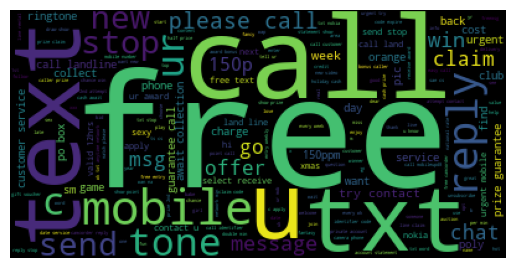

In [372]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = "black", max_words = 300)
spam_wc = cloud.generate(df[df['target']==1]['t_text'].str.cat(sep = " "))

plt.axis("off")
plt.imshow(spam_wc)

In [376]:
print(spam_wc.words_.keys())

dict_keys(['free', 'call', 'text', 'u', 'txt', 'mobile', 'reply', 'c', 'ur', 'tone', 'stop', 'send', 'new', 'please call', 'message', 'win', 'go', 'claim', 'chat', 'msg', 'offer', '150p', 'try contact', 'week', 'phone', 'poly', 'customer service', 'guarantee call', 'call landline', 'back', '150ppm', 'day', 'prize guarantee', 'po box', 'cost', 'sm', 'collect', 'club', 'orange', 'pic', 'await collection', 'urgent', 'charge', 'find', 'ringtone', 'service', 'want', 'game', 'select receive', 'urgent mobile', 'send stop', 'next', 'valid 12hrs', 'contact u', 'call land', 'land line', 'free text', 'apply', 'nokia', 'sexy', 'xmas', 'hi', 'ur award', 'private account', 'account statement', 'txt stop', 'credit', 'top', 'yr', 'content', 'hot', 'unsubscribe', 'chance win', 'draw show', 'call identifier', 'identifier code', 'date service', 'prize claim', '2nd attempt', 'attempt contact', 'winner', 'good', 'free entry', 'code expire', 'call mobileupd8', 'holiday cash', 'every week', 'late', 'use', 's

#### 5.2 a) top 30 words in spam

In [377]:
#extract those rows whose target is spam i.e. 1
df[df['target']==1]

In [ ]:
#extract those rows whose target is spam i.e. 1 and fetch out transformed text i.e. t_text
df[df['target']==1]['t_text']

In [379]:
#extract those rows whose target is spam i.e. 1 and fetch out transformed text i.e. t_text and convert it into list
df[df['target']==1]['t_text'].tolist()

#it is a list of string

['free entry 2 wkly comp win fa cup final tkts 21st may text fa 87121 receive entry question std txt rate c apply 08452810075over18',
 'freemsg hey darling 3 week word back like fun still tb ok xxx std chgs send rcv',
 'winner value network customer select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobile 11 month u r entitle update late colour mobile camera free call mobile update co free 08002986030',
 'six chance win cash 100 pound txt csh11 send cost 6days tsandcs apply reply hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt message click http',
 'england v macedonia do not miss news txt ur national team 87077 eg england 87077 try wale scotland poboxox36504w45wq',
 'thank subscription ringtone uk mobile charge please confirm reply yes reply charge',
 '07732584351 rodger burn msg try call reply sm free nokia mobile free camcorder please call 

In [380]:
#start a for loop and make corpus of spam messages
for msg in df[df['target']==1]['t_text'].tolist():
    print(msg)
    
#now i want to split every word

free entry 2 wkly comp win fa cup final tkts 21st may text fa 87121 receive entry question std txt rate c apply 08452810075over18
freemsg hey darling 3 week word back like fun still tb ok xxx std chgs send rcv
winner value network customer select receivea prize reward claim call claim code kl341 valid 12 hour
mobile 11 month u r entitle update late colour mobile camera free call mobile update co free 08002986030
six chance win cash 100 pound txt csh11 send cost 6days tsandcs apply reply hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt message click http
england v macedonia do not miss news txt ur national team 87077 eg england 87077 try wale scotland poboxox36504w45wq
thank subscription ringtone uk mobile charge please confirm reply yes reply charge
07732584351 rodger burn msg try call reply sm free nokia mobile free camcorder please call 08000930705 delivery tomorrow
sm ac sp

In [382]:
#let split every word. think... i want to check or interested in top 30 words in spam so i am going to split 
#every word

spam_corpus=[]
for msg in df[df['target']==1]['t_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
spam_corpus

['free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 '08452810075over18',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv',
 'winner',
 'value',
 'network',
 'customer',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobile',
 '11',
 'month',
 'u',
 'r',
 'entitle',
 'update',
 'late',
 'colour',
 'mobile',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030',
 'six',
 'chance',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6days',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'po

In [383]:
len(spam_corpus)       #total 9978 words in spam messages

9978

In [384]:
from collections import Counter
Counter(spam_corpus)                 #it will create a dictionary and count the no. of time a word repeat itself

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 139,
         'text': 121,
         'u': 119,
         'ur': 119,
         'mobile': 114,
         'stop': 104,
         'reply': 101,
         '4': 100,
         'claim': 98,
         'prize': 82,
         'get': 80,
         'send': 70,
         'new': 67,
         'service': 64,
         'tone': 63,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'please': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'min': 44,
         'customer': 42,
         'message': 42,
         'guarantee': 42,
         'per': 41,
         'chat': 38,
         'try': 37,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'line': 33,
         'go': 32,
         'offer': 32,
         'receive': 31,
         'want': 31,
         'late': 30,
         'r

In [385]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 139),
 ('text', 121),
 ('u', 119),
 ('ur', 119),
 ('mobile', 114),
 ('stop', 104),
 ('reply', 101),
 ('4', 100),
 ('claim', 98),
 ('prize', 82),
 ('get', 80),
 ('send', 70),
 ('new', 67),
 ('service', 64),
 ('tone', 63),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('please', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('min', 44),
 ('customer', 42)]

In [387]:
df_spam_30 = pd.DataFrame(Counter(spam_corpus).most_common(30))   #top 30 words
df_spam_30

,0,1
0,call,320
1,free,191
2,2,155
3,txt,139
4,text,121
5,u,119
6,ur,119
7,mobile,114
8,stop,104
9,reply,101


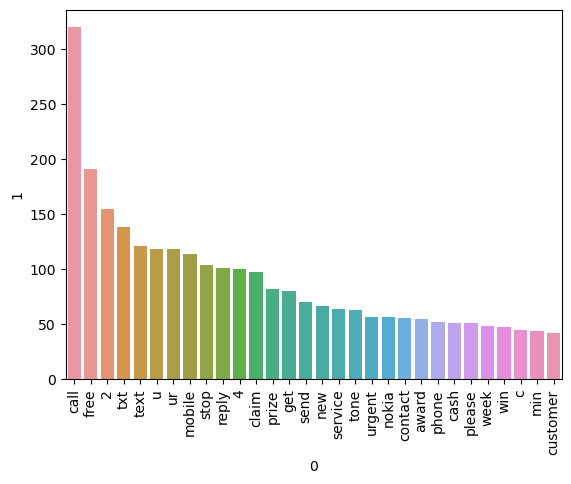

In [392]:
sns.barplot(x=0,
           y=1,
           data=df_spam_30)
plt.xticks(rotation = 90)
plt.show()

#### 5.3 wordcloud for ham

In [373]:
#let's see what are the top words in ham messages

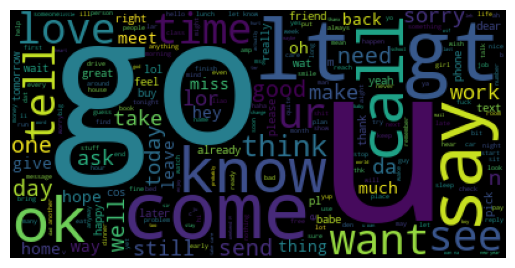

In [374]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = "black", max_words = 300)
ham_wc = cloud.generate(df[df['target']==0]['t_text'].str.cat(sep = " "))    #we will concat string which are separated by " " i.e. space

plt.axis("off")
plt.imshow(ham_wc)

In [375]:
print(ham_wc.words_.keys())

dict_keys(['u', 'go', 'lt gt', 'come', 'say', 'know', 'call', 'ok', 'love', 'ur', 'want', 'time', 'see', 'tell', 'think', 'good', 'need', 'one', 'day', 'well', 'send', 'still', 'make', 'da', 'take', 'lor', 'sorry', 'today', 'ask', 'work', 'n', 'thing', 'back', 'much', 'oh', 'give', 'hope', 'home', 'leave', 'hey', 'meet', 'way', 'miss', 'already', 'wat', 'feel', 'really', 'thank', 'yeah', 'dear', 'right', 'wait', 'e', 'cos', 'great', 'later', 'lol', 'babe', 'friend', 'm', 'please', 'phone', 'pl', 'pick', 'buy', 'text', 'tomorrow', 'happy', 'something', 'night', 'yes', 'hi', 'try', 'keep', 'life', 's', 'number', 'anything', 'find', 'sleep', 'finish', 'around', 'sure', 'late', 'amp', 'look', 'b', 'message', 'money', 'free', 'mean', 'smile', 'eat', 'use', 'guy', 'talk', 'msg', 'ìï', 'always', 'even', 'soon', 'will', 'tonight', 'happen', 'thk', 'many', 'place', 'plan', 'lot', 'wish', 'week', 'early', 'start', 'haha', 'ya', 'let', 'check', 'long', 'stuff', 'class', 'fine', 'yet', 'v', 'first

#### 5.3 a) top 30 words in ham

In [400]:
ham_corpus=[]
for msg in df[df['target']==0]['t_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
ham_corpus

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'get',
 'amore',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 'think',
 'go',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aids',
 'patent',
 'per',
 'request',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'go',
 'to',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'cry',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'will',
 'not',
 'take',
 'help',
 'grant',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'remember',
 '2',
 'spell',
 'name',
 'yes',
 'v',
 'naughty',
 'make',
 'v',
 'w

In [401]:
len(ham_corpus)

35878

In [404]:
from collections import Counter
df_ham_30 = pd.DataFrame(Counter(ham_corpus).most_common(30))
df_ham_30

,0,1
0,u,883
1,get,581
2,go,537
3,come,295
4,not,288
5,gt,288
6,lt,287
7,2,284
8,know,246
9,good,242


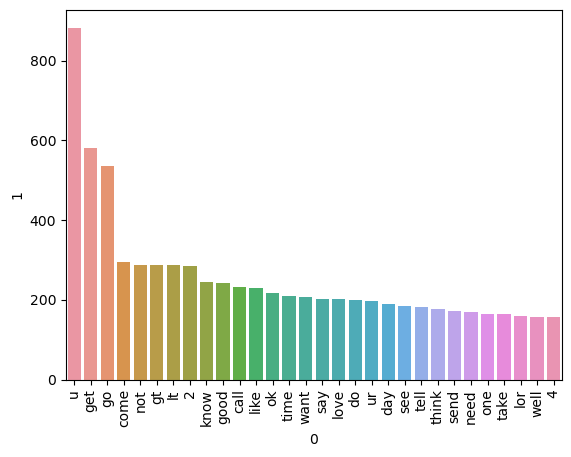

In [405]:
sns.barplot(x=0,
           y=1,
           data=df_ham_30)
plt.xticks(rotation = 90)
plt.show()

### 6. model building

In [406]:
#first we have to convert from input into numerical data or we can say we have to convert textual input into vectors

In [407]:
#bow
#tf-idf
#word2vec

In [601]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [602]:
#option A
# cv = CountVectorizer()                                       #ngram_range=(1,1) ... bydefault
# x = cv.fit_transform(df['t_text']).toarray()                 #converting sparse array into dense array
# x.shape

#option B
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['t_text']).toarray()
x.shape


(5169, 7011)

In [651]:
#START ------ START ----- START -------
#iterative steps for section 7 STARTS here

In [652]:
y = df['target'].values
y.shape

(5169,)

In [653]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

#### 6.1 NaiveBayes

In [654]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB  #i don't know about the distribution so i call all NB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

#note: in email spam classifier we want high precision score/value

##### 6.1.1 GaussianNB

In [655]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

#option A (CountVectorizer)
#1. accuracy is 86%
#2. precision is 50%
#note : we want high precision

0.8839458413926499
[[796 100]
 [ 20 118]]
0.5412844036697247


##### 6.1.2 MultinomialNB

In [656]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

#option A (CountVectorizer)
#1. accuracy is 96%
#2. precision is 84%
#note : we want high precision as compared to accuracy

#option B (TfidfVectorizer)
#note : in case of tfidf precision here is increased to 100% and precision matters most in ham and spam
#       so, i choose this model

0.9400386847195358
[[896   0]
 [ 62  76]]
1.0


##### 6.1.3 BernoulliNB

In [657]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

#option A (CountVectorizer)
#1. accuracy is 97%
#2. precision is 98%
#note : here precision is higher

0.9845261121856866
[[895   1]
 [ 15 123]]
0.9919354838709677


#### 6.2 trying various models

In [658]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [659]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [660]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [661]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [662]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.9390715667311412
Precision -  0.8712871287128713
For  NB
Accuracy -  0.9400386847195358
Precision -  1.0
For  DT
Accuracy -  0.9477756286266924
Precision -  0.8962264150943396
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9611650485436893
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  AdaBoost
Accuracy -  0.9671179883945842
Precision -  0.9193548387096774
For  BgC
Accuracy -  0.965183752417795
Precision -  0.9112903225806451
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.9661508704061895
Precision -  0.9256198347107438


In [663]:
#end ------ end ----- end -------
#iterative steps for section 7 ends here

In [616]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.899420,1.000000
2,NB,0.956480,1.000000
8,ETC,0.979691,1.000000
5,RF,0.968085,0.981651
0,SVC,0.972921,0.974138
10,xgb,0.970019,0.934959
4,LR,0.947776,0.928571
6,AdaBoost,0.961315,0.922414
9,GBDT,0.951644,0.915094
7,BgC,0.964217,0.891473


### 7. model improvement

#### 7.1 change the max_features parameter of Tfidf

In [617]:
#option C
tfidf = TfidfVectorizer(max_features=3000)             #earlier max_features were taken bydefault now we take 3000
x = tfidf.fit_transform(df['t_text']).toarray()
x.shape

#now run all the models in section 6 and append the result with this.

(5169, 3000)

In [631]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_f_3000':accuracy_scores,'Precision_max_f_3000':precision_scores}).sort_values('Precision_max_f_3000',ascending=False)
temp_df

,Algorithm,Accuracy_max_f_3000,Precision_max_f_3000
1,KN,0.906190,1.000000
2,NB,0.971954,1.000000
5,RF,0.973888,0.982609
0,SVC,0.977756,0.975207
8,ETC,0.977756,0.975207
4,LR,0.956480,0.969697
6,AdaBoost,0.963250,0.954545
9,GBDT,0.951644,0.931373
10,xgb,0.966151,0.925620
7,BgC,0.956480,0.866142


In [632]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df
#observation : 1) accuracy of naivebayes increases.

,Algorithm,Accuracy,Precision,Accuracy_max_f_3000,Precision_max_f_3000
0,KN,0.899420,1.000000,0.906190,1.000000
1,NB,0.956480,1.000000,0.971954,1.000000
2,ETC,0.979691,1.000000,0.977756,0.975207
3,RF,0.968085,0.981651,0.973888,0.982609
4,SVC,0.972921,0.974138,0.977756,0.975207
5,xgb,0.970019,0.934959,0.966151,0.925620
6,LR,0.947776,0.928571,0.956480,0.969697
7,AdaBoost,0.961315,0.922414,0.963250,0.954545
8,GBDT,0.951644,0.915094,0.951644,0.931373
9,BgC,0.964217,0.891473,0.956480,0.866142


#### 7.2 scaling of input data and keeping max_features=3000 and we are still using Tfidf unigram

In [633]:
#option D
tfidf = TfidfVectorizer(max_features=3000)             #earlier max_features were taken bydefault now we take 3000
x = tfidf.fit_transform(df['t_text']).toarray()
x.shape

(5169, 3000)

In [634]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x.shape

#now run all the models in section 6 and append the result with this.

#note : we can't do StandardScaler here because it will give negative values and negative values are not accepted
#       by naivebayes.

(5169, 3000)

In [647]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
temp_df

,Algorithm,Accuracy_scaling,Precision_scaling
5,RF,0.973888,0.982609
1,KN,0.905222,0.976190
8,ETC,0.977756,0.975207
4,LR,0.967118,0.964286
6,AdaBoost,0.963250,0.954545
0,SVC,0.973888,0.951220
2,NB,0.979691,0.946565
9,GBDT,0.951644,0.931373
10,xgb,0.966151,0.925620
7,BgC,0.956480,0.866142


In [648]:
new_df = new_df.merge(temp_df,on='Algorithm')
new_df
#observation : 1) precision of naivebayes decreases
#              so, there is no benefit of scaling

,Algorithm,Accuracy,Precision,Accuracy_max_f_3000,Precision_max_f_3000,Accuracy_scaling,Precision_scaling
0,KN,0.899420,1.000000,0.906190,1.000000,0.905222,0.976190
1,NB,0.956480,1.000000,0.971954,1.000000,0.979691,0.946565
2,ETC,0.979691,1.000000,0.977756,0.975207,0.977756,0.975207
3,RF,0.968085,0.981651,0.973888,0.982609,0.973888,0.982609
4,SVC,0.972921,0.974138,0.977756,0.975207,0.973888,0.951220
5,xgb,0.970019,0.934959,0.966151,0.925620,0.966151,0.925620
6,LR,0.947776,0.928571,0.956480,0.969697,0.967118,0.964286
7,AdaBoost,0.961315,0.922414,0.963250,0.954545,0.963250,0.954545
8,GBDT,0.951644,0.915094,0.951644,0.931373,0.951644,0.931373
9,BgC,0.964217,0.891473,0.956480,0.866142,0.956480,0.866142


#### 7.3 adding num_char as a new feature and keeping max_features=3000 and we are still using Tfidf unigram

In [649]:
#option E
tfidf = TfidfVectorizer(max_features=3000)           
x = tfidf.fit_transform(df['t_text']).toarray()
x.shape

(5169, 3000)

In [650]:
#append the new feature num_char
x = np.hstack((x,df['num_char'].values.reshape(-1,1)))
x.shape

(5169, 3001)

In [664]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_char':accuracy_scores,'Precision_num_char':precision_scores}).sort_values('Precision_num_char',ascending=False)
temp_df

,Algorithm,Accuracy_num_char,Precision_num_char
2,NB,0.940039,1.000000
5,RF,0.972921,0.982456
8,ETC,0.979691,0.975610
4,LR,0.958414,0.961165
9,GBDT,0.950677,0.930693
10,xgb,0.966151,0.925620
6,AdaBoost,0.967118,0.919355
7,BgC,0.965184,0.911290
3,DT,0.947776,0.896226
1,KN,0.939072,0.871287


In [665]:
new_df = new_df.merge(temp_df,on='Algorithm')
new_df
#observation : 1) accuracy of naivebayes decreases
#              so, there is no benefit of adding num_char

,Algorithm,Accuracy,Precision,Accuracy_max_f_3000,Precision_max_f_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_char,Precision_num_char
0,KN,0.899420,1.000000,0.906190,1.000000,0.905222,0.976190,0.939072,0.871287
1,NB,0.956480,1.000000,0.971954,1.000000,0.979691,0.946565,0.940039,1.000000
2,ETC,0.979691,1.000000,0.977756,0.975207,0.977756,0.975207,0.979691,0.975610
3,RF,0.968085,0.981651,0.973888,0.982609,0.973888,0.982609,0.972921,0.982456
4,SVC,0.972921,0.974138,0.977756,0.975207,0.973888,0.951220,0.866538,0.000000
5,xgb,0.970019,0.934959,0.966151,0.925620,0.966151,0.925620,0.966151,0.925620
6,LR,0.947776,0.928571,0.956480,0.969697,0.967118,0.964286,0.958414,0.961165
7,AdaBoost,0.961315,0.922414,0.963250,0.954545,0.963250,0.954545,0.967118,0.919355
8,GBDT,0.951644,0.915094,0.951644,0.931373,0.951644,0.931373,0.950677,0.930693
9,BgC,0.964217,0.891473,0.956480,0.866142,0.956480,0.866142,0.965184,0.911290


#### 7.4 Voting Classifier (ensemble technique)

In [666]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [667]:
tfidf = TfidfVectorizer(max_features=3000)           
x = tfidf.fit_transform(df['t_text']).toarray()
x.shape

(5169, 3000)

In [668]:
y = df['target'].values
y.shape

(5169,)

In [669]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [670]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('SVC',svc),('NB',mnb),('ETC',etc)],voting='soft')
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('SVC',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('NB', MultinomialNB()),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [671]:
y_pred = vc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

#no good benefit of doing this

0.9806576402321083
[[895   1]
 [ 19 119]]
0.9916666666666667


#### 7.5 applying stacking

In [672]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [673]:
tfidf = TfidfVectorizer(max_features=3000)           
x = tfidf.fit_transform(df['t_text']).toarray()
x.shape

(5169, 3000)

In [674]:
y = df['target'].values
y.shape

(5169,)

In [675]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=[('SVC',svc),('NB',mnb),('ETC',etc)], final_estimator=RandomForestClassifier())
clf.fit(x_train,y_train)

StackingClassifier(estimators=[('SVC',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('NB', MultinomialNB()),
                               ('ETC',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [676]:
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

#no good benefit of doing this

0.9796905222437138
[[889   7]
 [ 14 124]]
0.9465648854961832


In [677]:
#result :
#we will go with multinomialNB and keeping max_features=3000 and we are still using Tfidf unigram

### 8. pipeline creation

In [678]:
#in this section, we will create a pipeline and we will convert it into a website
#we are going with MultinomialNB model and keeping max_features=3000 and we are still using Tfidf unigram

In [679]:
#pipeline :
#
#1) text preprocessing
#2) vectorization
#3) apply algorithm

In [680]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
x = tfidf.fit_transform(df['t_text']).toarray()
x.shape

(5169, 3000)

In [681]:
y = df['target'].values
y.shape

(5169,)

In [682]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [683]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
mnb = MultinomialNB()

In [684]:
mnb.fit(x_train,y_train)

y_pred = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


#### 8.1 exporting the model 

In [685]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl','wb'))          #wb = write binary
pickle.dump(mnb, open('model.pkl','wb'))      #pipe = model_name

In [686]:
#in our destination folder we can see two file :
#vectorizer.pkl
#model.pkl

#now open vscode